In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("placement.csv")

In [9]:
df.sample(5)

,cgpa,placement_exam_marks,placed
629,8.15,11.0,1
35,7.48,12.0,0
583,7.10,68.0,0
77,7.10,28.0,1
266,7.73,50.0,1


<Axes: xlabel='cgpa', ylabel='placement_exam_marks'>

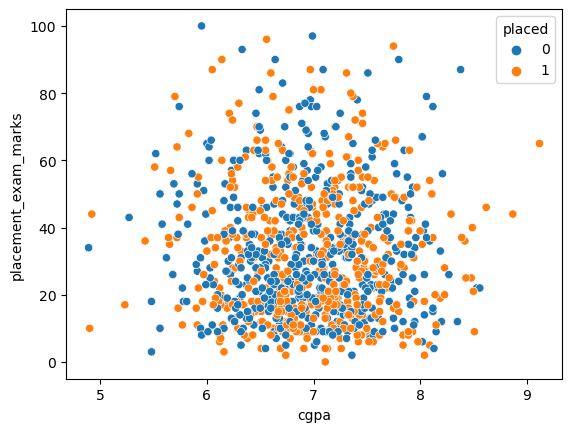

In [5]:
sns.scatterplot(data=df,x='cgpa',y='placement_exam_marks',hue='placed')

C:\Users\raj\AppData\Local\Temp\ipykernel_21460\1213736394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'],hist=False)
C:\Users\raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cgpa', ylabel='Density'>

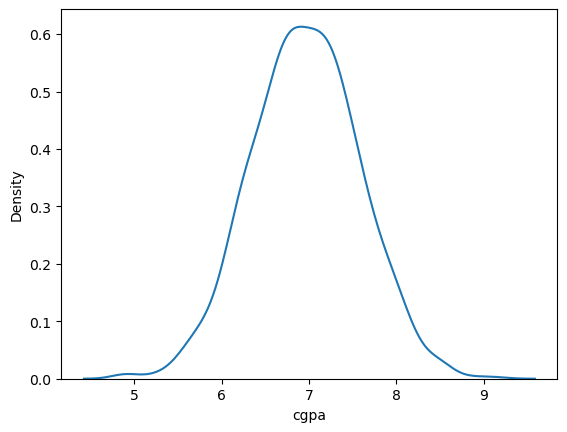

In [7]:
sns.distplot(df['cgpa'],hist=False)

C:\Users\raj\AppData\Local\Temp\ipykernel_21460\2406320711.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'],hist=False)
C:\Users\raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

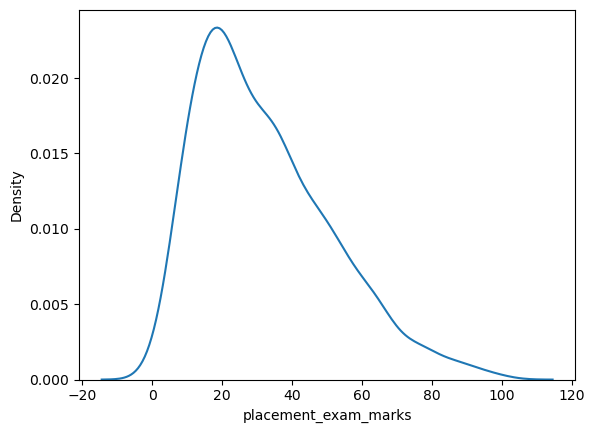

In [8]:
sns.distplot(df['placement_exam_marks'],hist=False)

C:\Users\raj\AppData\Local\Temp\ipykernel_21460\3792736820.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\raj\AppData\Local\Temp\ipykernel_21460\3792736820.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `hi

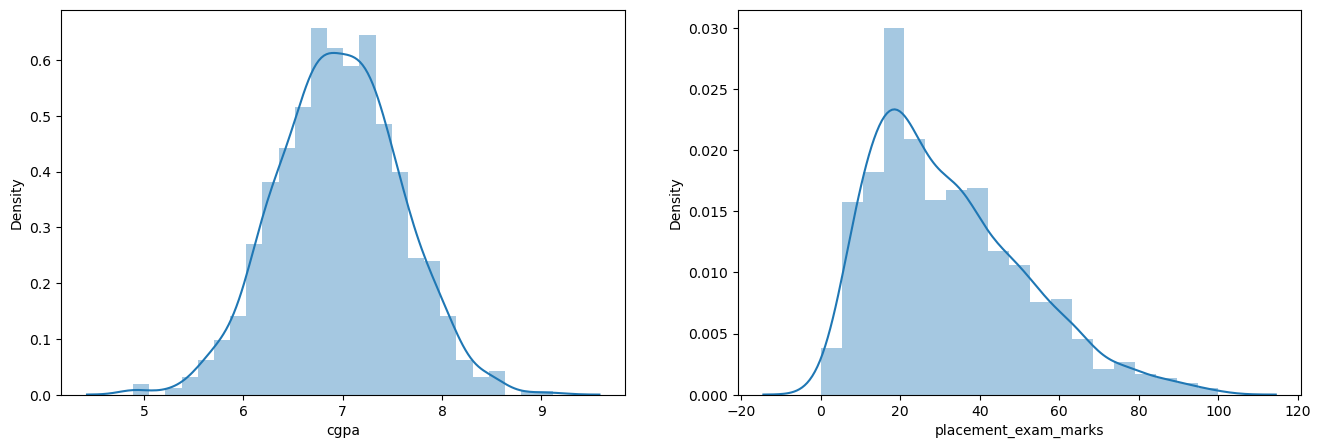

In [10]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [13]:
print("mean: ",df['cgpa'].mean())
print("cgpa : ",df['cgpa'].std())
print("min",df['cgpa'].min())
print("max : ",df['cgpa'].max())

mean:  6.96124
cgpa :  0.6158978751323894
min 4.89
max :  9.12


In [15]:
# zescor
print("Hihest allowed",df['cgpa'].mean()+3*df['cgpa'].std())
print("lowerst value: ",df['cgpa'].mean()-3*df['cgpa'].std())

Hihest allowed 8.808933625397168
lowerst value:  5.113546374602832


In [21]:
#finding the outliers 
df[  (df['cgpa']> 8.80)  | (df['cgpa'] <5.11)  ]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [23]:
df[  (df['cgpa']>8.80)  | (df['cgpa'] <5.11)  ].sum()

cgpa                     32.7
placement_exam_marks    197.0
placed                    4.0
dtype: float64

removing outliers

# triming


In [34]:
new_df=df[  (df['cgpa']<8.80)  & (df['cgpa'] >5.11)  ]
new_df.shape

(995, 3)

In [35]:
df.shape  # 5 student are removed from data frame

(1000, 3)

In [36]:
df['cgpa_zscore']=( df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [37]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [38]:
df[df['cgpa_zscore']>3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [39]:
df[df['cgpa_zscore']<-3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


# capping

In [41]:
upper_limit=df['cgpa'].mean()+ 3*df['cgpa'].std()
lower_limit=df['cgpa'].mean() - 3*df['cgpa'].std()

In [52]:
upper_limit

8.808933625397168

In [42]:
lower_limit

5.113546374602832

In [46]:
df['cgpa']=np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
    
)

In [48]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

In [49]:
df.shape

(1000, 4)

<Axes: >

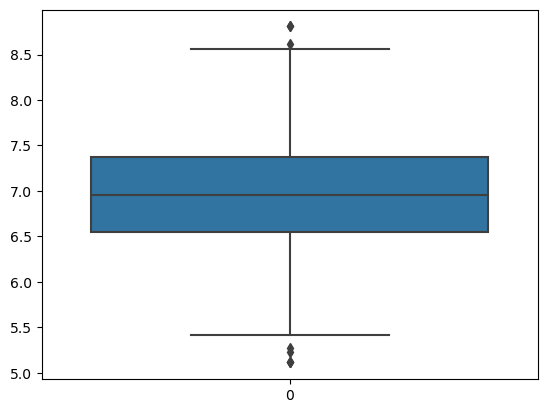

In [51]:
sns.boxplot(df['cgpa'])

C:\Users\raj\AppData\Local\Temp\ipykernel_21460\1213736394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'],hist=False)
C:\Users\raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cgpa', ylabel='Density'>

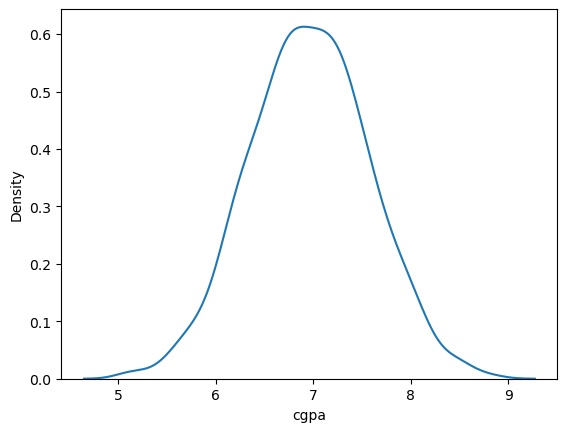

In [53]:
sns.distplot(df['cgpa'],hist=False)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
 3   cgpa_zscore           1000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


# placement_exam_marks working o